In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import *

In [30]:
dataset=pd.read_csv('banking.txt')
#dataset=preprocessing.normalize(dataset1,norm='l2')
print(dataset.head())
X = dataset[['nr_employed', 'euribor3m', 'previous','cons_conf_idx','age','emp_var_rate','cons_price_idx']]
y = dataset['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

In [32]:
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)
y_pred=log_regression.predict(X_test)
cnf_matrix=metrics.confusion_matrix (y_test, y_pred)
cnf_matrix


array([[10865,   116],
       [ 1237,   139]], dtype=int64)

<AxesSubplot:>

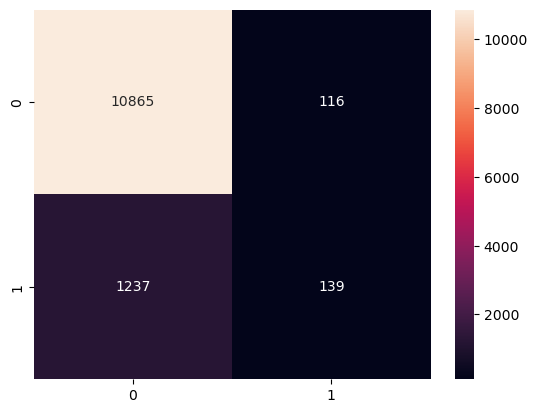

In [33]:
ax=plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [19]:
#Маємо найкращий True Positive результат, але і значну кількість False Negative співрозмірно до інших

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

#Доля вірних відповідей моделі Accuracy 89%
#Визначені моделлю як позитивні і дійсно позитивні: Precision: 54%


Accuracy: 0.890507404709881
Precision: 0.5450980392156862
Recall: 0.10101744186046512
F1: [0.94138544 0.17044758]


In [29]:
y_pred_proba=log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test, y_pred_proba)

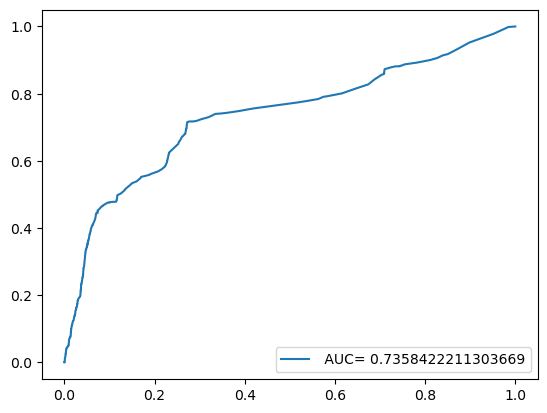

In [9]:
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Площа під кривою не одиниця як при відсутності помилок
#Cудячі з F1 та решти всіх показників - вірогіднише за все не відкриє клієнт вклад 